# Ensemble

- 다양한 알고리즘으로 모델을 만들고 성능을 비교하기
- 항공사 만족도 예측

# 0. 라이브러리 불러오기 및 데이터 준비하기

In [22]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [23]:
# 데이터 불러오기
path = '../data/airline_satisfaction.csv'
data = pd.read_csv(path)

**데이터 설명**

- id : 탑승자 고유 아이디
- gender: 성별 (Female, Male)
- customer_type: 고객 유형 (Loyal customer, disloyal customer)
- age: 탑승자 나이
- type_of_travel: 비행 목적(Personal Travel, Business Travel)
- class: 등급 (Business, Eco, Eco Plus)
- flight_distance: 비행 거리
- inflight_wifi_service: 와이파이 서비스 만족도 (0:N/A; 1-5)
- departure/arrival_time_convenient: 출발, 도착 시간 만족도 (0:N/A; 1-5)
- ease_of_online_booking: 온라인 부킹 만족도 (0:N/A; 1-5)
- gate_location: 게이트 위치 만족도 (0:N/A; 1-5)
- food_and_drink: 식사와 음료 만족도 (0:N/A; 1-5)
- online_boarding: 온라인 보딩 만족도 (0:N/A; 1-5)
- seat_comfort: 좌석 편안함 만족도 (0:N/A; 1-5)
- inflight_entertainment: 기내 엔터테인먼트 만족도 (0:N/A; 1-5)
- on-board_service: 온 보드 서비스 만족도 (0:N/A; 1-5)
- leg_room_service: 다리 공간 만족도 (0:N/A; 1-5)
- baggage_handling: 수하물 처리 만족도 (0:N/A; 1-5)
- check-in_service: 체크인 서비스 만족도 (0:N/A; 1-5)
- inflight_service: 기내 서비스 만족도 (0:N/A; 1-5)
- cleanliness: 청결 만족도 (0:N/A; 1-5)
- departure_delay_in_minutes: 출발 지연 시간(분)
- arrival_delay_in_minutes: 도착 지연 시간(분)
- satisfaction: 항공 만족도(1: Satisfaction, 0: Neutral or Dissatisfaction) - Target

# 1. 데이터 파악하기

In [24]:
# 데이터 살펴보기
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2580 non-null   int64  
 1   gender                             2580 non-null   object 
 2   customer_type                      2580 non-null   object 
 3   age                                2580 non-null   int64  
 4   type_of_travel                     2580 non-null   object 
 5   class                              2580 non-null   object 
 6   flight_distance                    2580 non-null   int64  
 7   inflight_wifi_service              2580 non-null   int64  
 8   departure/arrival_time_convenient  2580 non-null   int64  
 9   ease_of_online_booking             2580 non-null   int64  
 10  gate_location                      2580 non-null   int64  
 11  food_and_drink                     2580 non-null   int64

In [26]:
# 기술통계 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2580.0,65179.742248,37320.994433,54.0,32988.75,64877.0,97717.0,129860.0
age,2580.0,39.229845,15.295065,7.0,26.00,40.0,51.0,85.0
flight_distance,2580.0,1204.824806,1008.852185,67.0,405.75,860.0,1754.5,4963.0
inflight_wifi_service,2580.0,2.732558,1.317032,0.0,2.00,3.0,4.0,5.0
departure/arrival_time_convenient,2580.0,3.041473,1.542290,0.0,2.00,3.0,4.0,5.0
ease_of_online_booking,2580.0,2.758527,1.400792,0.0,2.00,3.0,4.0,5.0
gate_location,2580.0,2.973256,1.271752,1.0,2.00,3.0,4.0,5.0
food_and_drink,2580.0,3.229457,1.341635,0.0,2.00,3.0,4.0,5.0
online_boarding,2580.0,3.242248,1.341842,0.0,2.00,3.0,4.0,5.0
seat_comfort,2580.0,3.440310,1.329681,1.0,2.00,4.0,5.0,5.0


# 2. 데이터 전처리

**1) 변수 제거**

In [27]:
# 제거 대상: id, departure/arrival_time_convenient, gate_location, departure_delay_in_minutes
drop_cols = ['id', 'departure/arrival_time_convenient', 'gate_location', 'departure_delay_in_minutes']

# 변수 제거
data.drop(columns=drop_cols, axis=1, inplace=True)

# 확인
data.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1


**2) 결측치 제거**

In [28]:
# 결측치 제거
data = data.dropna(axis = 0)

# 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2574 entries, 0 to 2579
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    2574 non-null   object 
 1   customer_type             2574 non-null   object 
 2   age                       2574 non-null   int64  
 3   type_of_travel            2574 non-null   object 
 4   class                     2574 non-null   object 
 5   flight_distance           2574 non-null   int64  
 6   inflight_wifi_service     2574 non-null   int64  
 7   ease_of_online_booking    2574 non-null   int64  
 8   food_and_drink            2574 non-null   int64  
 9   online_boarding           2574 non-null   int64  
 10  seat_comfort              2574 non-null   int64  
 11  inflight_entertainment    2574 non-null   int64  
 12  on-board_service          2574 non-null   int64  
 13  leg_room_service          2574 non-null   int64  
 14  baggage_

**3) x, y 분리**

In [29]:
# target 값 확인
target = 'satisfaction'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:,target]

**4) 가변수화**

In [30]:
# 가변수 대상 : gender, customer_type, type_of_travel, class
dumm_cols = ['gender', 'customer_type', 'type_of_travel', 'class']

# 가변수화
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)

# 확인
x.head()

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,class_Eco,class_Eco Plus
0,13,460,3,3,5,3,5,5,4,3,4,4,5,5,18.0,1,0,1,0,1
1,25,235,3,3,1,3,1,1,1,5,3,1,4,1,6.0,1,1,0,0,0
2,26,1142,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0,0,0,0,0
3,25,562,2,5,2,2,2,2,2,5,3,1,4,2,9.0,0,0,0,0,0
4,61,214,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,0,0,0,0


**4) 학습용, 평가용 데이터 분리**

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

**5) 정규화**

In [32]:
# 라이브러리 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler =MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# 3. 성능예측

In [68]:
# 불러오기

# 모델
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 성능 튜닝
from sklearn.model_selection import cross_val_score, GridSearchCV

# 성능 확인
from sklearn.metrics import confusion_matrix, classification_report

**0) 결과 저징할 리스트 생성**

In [34]:
result =dict()

**1) KNN**

In [35]:
# 선언하기
model = KNeighborsClassifier(n_neighbors=5)

In [36]:
# 학습하기
model.fit(x_train_s, y_train)

KNeighborsClassifier()

In [37]:
# 예측하기
y_pred = model.predict(x_test_s)

In [38]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[417  17]
 [ 67 272]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       434
           1       0.94      0.80      0.87       339

    accuracy                           0.89       773
   macro avg       0.90      0.88      0.89       773
weighted avg       0.90      0.89      0.89       773



In [39]:
# 성능 평가 수집
cv_score = cross_val_score(model,
                           x_train_s, 
                           y_train, cv=10)
result['KNN'] = cv_score.mean()

**2) Decision Tree**

In [40]:
# 선언하기
model = DecisionTreeClassifier(max_depth=5, random_state=1)

In [41]:
# 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [42]:
# 예측하기
y_pred = model.predict(x_test)

In [43]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[421  13]
 [ 75 264]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       434
           1       0.95      0.78      0.86       339

    accuracy                           0.89       773
   macro avg       0.90      0.87      0.88       773
weighted avg       0.89      0.89      0.88       773



In [44]:
cv_score = cross_val_score(model,
                          x_train, 
                           y_train, 
                           cv=10)
result['DecisionTree'] = cv_score.mean()

**3) Logistic Regression**

In [45]:
# 선언하기
model = LogisticRegression()

In [ ]:
# 학습하기
model.fit(x_train, y_train)

In [ ]:
# 예측하기
y_pred = model.predict(x_test)

In [ ]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
cv_score = cross_val_score(model,
                          x_train, 
                           y_train, 
                           cv=10)
result['LogisticRegression'] = cv_score.mean()

**4) Random Forest**

In [ ]:
# 선언하기
model = RandomForestClassifier(max_depth=5,random_state=1)

In [ ]:
# 학습하기
model.fit(x_train,y_train)

In [ ]:
# 예측하기
y_pred = model.predict(x_test)

print(y_pred[:5])
print(y_test[:5].values)

In [ ]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Feature 중요도 확인
print(list(x))
print(model.feature_importances_)

plt.barh(y=list(x), width=model.feature_importances_)
plt.show()

In [ ]:
cv_score = cross_val_score(model,
                          x_train, 
                           y_train, 
                           cv=10)
result['RandomForest'] = cv_score.mean()

**5) XGBoost**

In [46]:
# 선언하기
model = XGBClassifier(max_depth=5,random_state=1)

In [47]:
# 학습하기
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [48]:
# 예측하기
y_pred = model.predict(x_test)

In [49]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[418  16]
 [ 30 309]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       434
           1       0.95      0.91      0.93       339

    accuracy                           0.94       773
   macro avg       0.94      0.94      0.94       773
weighted avg       0.94      0.94      0.94       773



['age', 'flight_distance', 'inflight_wifi_service', 'ease_of_online_booking', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'arrival_delay_in_minutes', 'gender_Male', 'customer_type_disloyal Customer', 'type_of_travel_Personal Travel', 'class_Eco', 'class_Eco Plus']
[0.01415    0.00832596 0.08805849 0.01726155 0.00633488 0.27868986
 0.02291588 0.05553415 0.01247231 0.0343452  0.02255159 0.02925428
 0.03205393 0.02486507 0.01458639 0.01312579 0.07642423 0.20136337
 0.03951699 0.00817017]


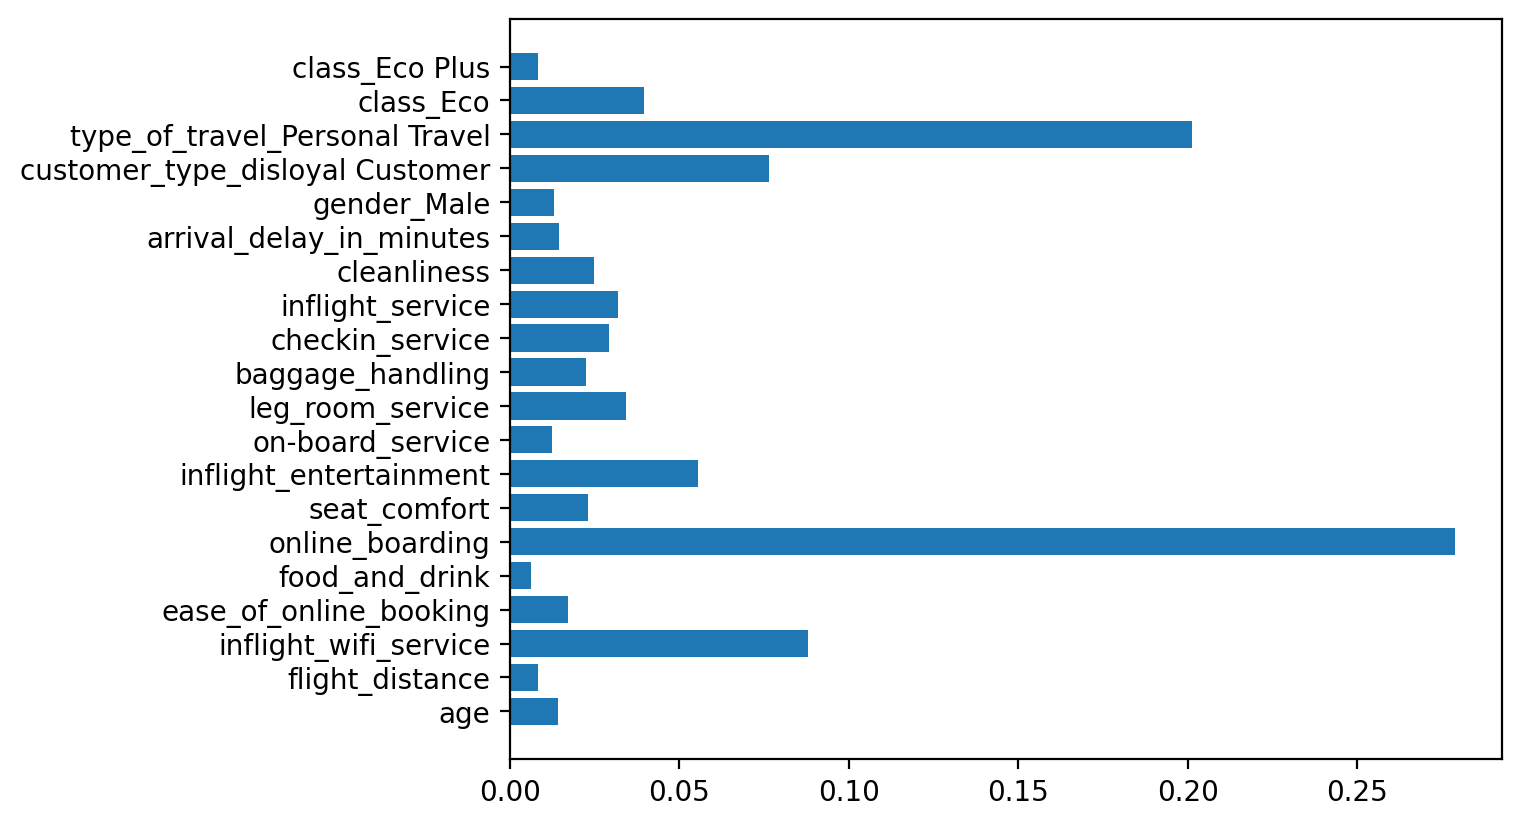

In [50]:
# Feature 중요도 확인
print(list(x))
print(model.feature_importances_)

plt.barh(y=list(x), width=model.feature_importances_)
plt.show()

In [51]:
cv_score = cross_val_score(model,
                          x_train, 
                           y_train, 
                           cv=10)
result['XGBoost'] = cv_score.mean()

**6) LightGBM**

In [52]:
# 선언하기
model = LGBMClassifier(random_state=1, verbose=-100)

In [53]:
# 학습하기
model.fit(x_train, y_train)

LGBMClassifier(random_state=1, verbose=-100)

In [54]:
# 예측하기
y_pred = model.predict(x_test)

In [55]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[423  11]
 [ 34 305]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       434
           1       0.97      0.90      0.93       339

    accuracy                           0.94       773
   macro avg       0.95      0.94      0.94       773
weighted avg       0.94      0.94      0.94       773



['age', 'flight_distance', 'inflight_wifi_service', 'ease_of_online_booking', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'arrival_delay_in_minutes', 'gender_Male', 'customer_type_disloyal Customer', 'type_of_travel_Personal Travel', 'class_Eco', 'class_Eco Plus']
[433 391 372 106  41 154 128  97 118 114 132 192 124 109 160  42 111 107
  62   7]


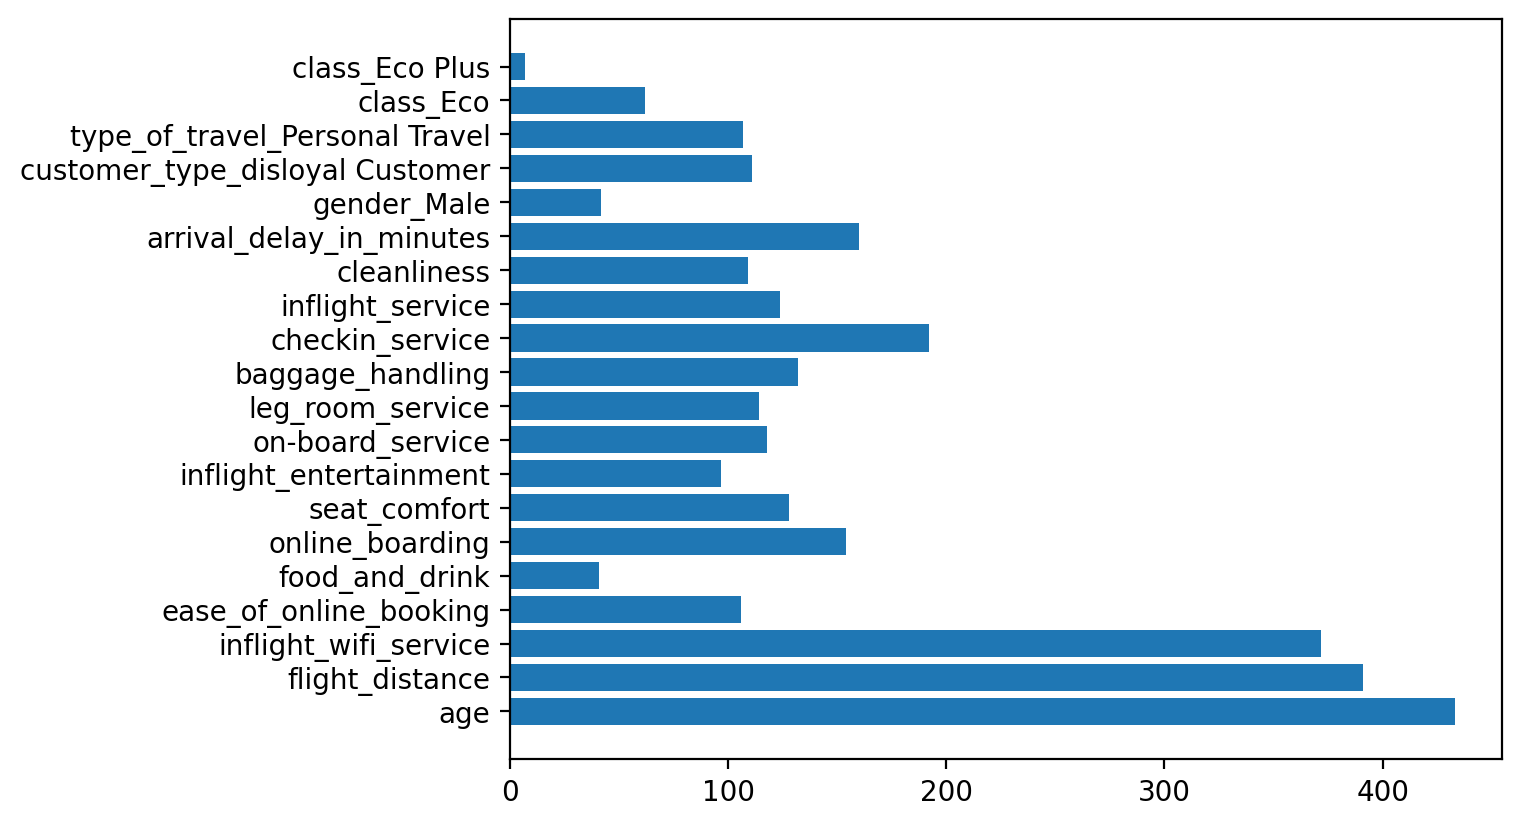

In [56]:
# Feature 중요도 확인
print(list(x))
print(model.feature_importances_)

plt.barh(y=list(x), width=model.feature_importances_)
plt.show()

In [57]:
cv_score = cross_val_score(model,
                          x_train, 
                           y_train, 
                           cv=10)
result['LGMBClass'] = cv_score.mean()

# 4. 성능 결과 확인하기

In [58]:
result

{'KNN': 0.887829957028852,
 'DecisionTree': 0.8978360957642725,
 'XGBoost': 0.9344782074892573,
 'LGMBClass': 0.9350276243093922}

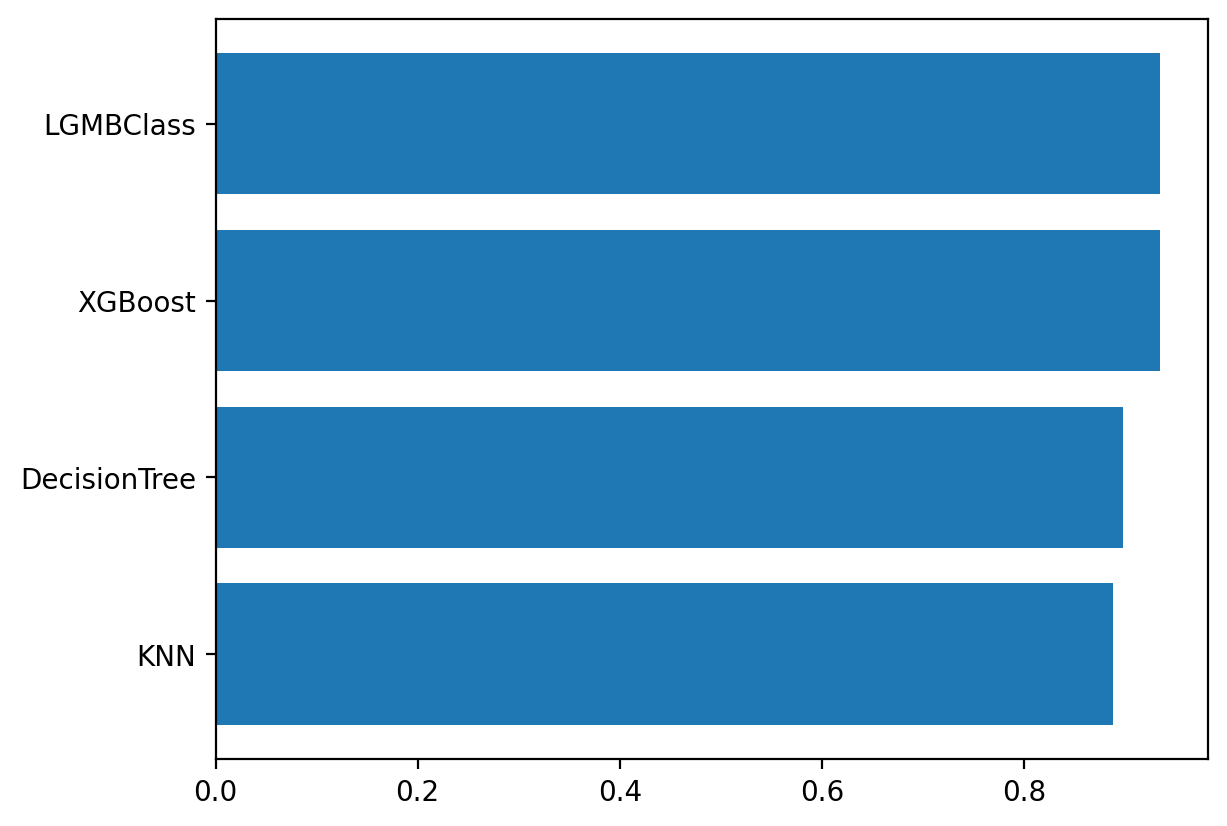

In [59]:
plt.barh(list(result.keys()), result.values())
plt.show()

# 5. 성능 튜닝
- 위 4번의 성능 결과에서 가장 좋을 것으로 예측된 모델을 튜닝한다.

In [60]:
# 모델 선언
model_LGBMC = LGBMClassifier(random_state=1, verbose=-100)

In [61]:
# 파라미터 지정
param = {'max_depth':range(1,101)}

In [62]:
# 모델 선언
final_model = GridSearchCV(model_LGBMC,
                          param,
                          cv=5,)

In [63]:
# 학습하기
final_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=1, verbose=-100),
             param_grid={'max_depth': range(1, 101)})

In [64]:
# 성능 검증하기
print(final_model.best_params_) # 최고의 파라미터
print(final_model.best_score_) # 최고 점수

{'max_depth': 18}
0.9355894121268081


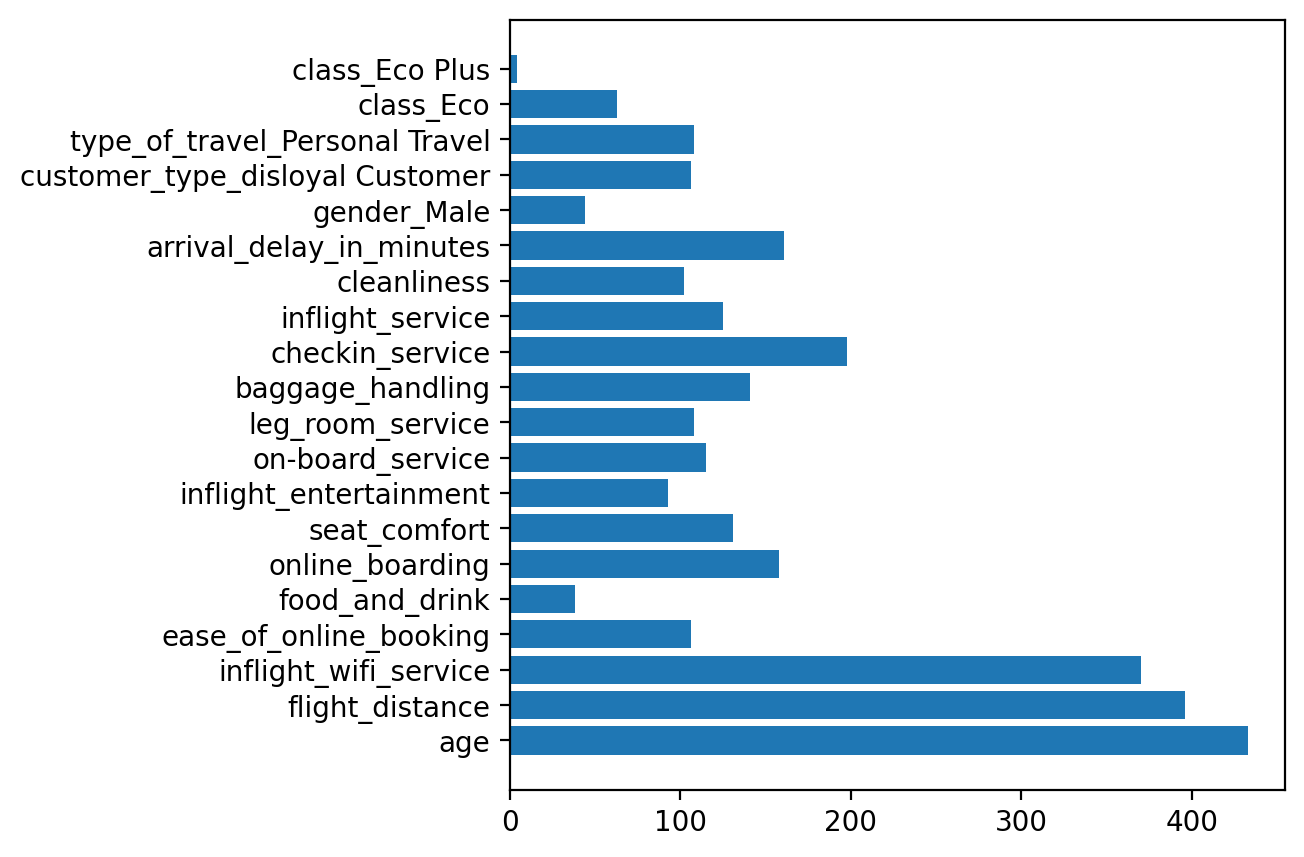

In [65]:
# 변수 중요도 시각화
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=final_model.best_estimator_.feature_importances_)
plt.show()

# 6. 성능 평가

In [66]:
# 예측하기
final_y_pred = final_model.predict(x_test)
final_y_pred[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [67]:
# 성능평가
print(confusion_matrix(y_test, final_y_pred))
print(classification_report(y_test, final_y_pred))

[[424  10]
 [ 34 305]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       434
           1       0.97      0.90      0.93       339

    accuracy                           0.94       773
   macro avg       0.95      0.94      0.94       773
weighted avg       0.94      0.94      0.94       773

